In [40]:
import pydotplus
from black.trans import StringID
from pandas import DataFrame
from sklearn import tree
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
import pandas as pd
import numpy as np

# 打开并读取数据文件
with open('xigua.txt',encoding='utf-8')  as fr:
    lenses = [inst.strip().split('\t') for inst in fr.readlines()]
lenses
# 提取目标变量
lenses_target = []
for each in lenses:
    lenses_target.append(each[-1])
from math import log2

# 定义特征标签
lensesLabels = ['色泽', '根蒂', '敲声', '纹理', '脐部', '触感']

# 将数据转换为字典格式，以便于创建DataFrame
lenses_list=[]
lenses_dict = {}
for each_label in lensesLabels:
    for each in lenses:
        # 然后，对lensesLabels中的每个标签进行迭代。对于每个标签，再对lenses中的每个元素进行迭代，将与当前标签对应的元素添加到lenses_list中。
        lenses_list.append(each[lensesLabels.index(each_label)])
    # 接下来，将lenses_list作为值，当前的标签作为键，添加到lenses_dict中。
    lenses_dict[each_label] = lenses_list
    lenses_list=[]
# 创建DataFrame
lenses_pd = pd.DataFrame(lenses_dict)

# 使用LabelEncoder将字符串标签转换为数字
le = LabelEncoder()
for col in lenses_pd.columns:
    lenses_pd[col] = le.fit_transform(lenses_pd[col])

# print(lenses_target)
print(lenses_pd)

# 将lenses_pd 转化为arr
lenses_pd = lenses_pd.to_numpy()
# 根据平均值进行归一化
lenses_pd = lenses_pd - np.mean(lenses_pd, axis=0)
print(lenses_pd)

# labels, centroids = kmeans(embeddings, K=3)
s = [[0.697,0.460],[0.774,0.376],[0.634,0.264],[0.608,0.318],[0.556,0.215],[0.403,0.237],[0.481,0.149],[0.437,0.211],[0.666,0.091],[0.243,0.267],[0.245,0.057],[0.343,0.099],[0.639,0.161],[0.657,0.198],[0.360,0.370],[0.593,0.042],[0.719,0.103]]

s = np.array(s)
print(s.shape)
print(lenses_pd.shape)
# 将 s (17, 2) 和 lenses_pd (17, 6) 合并为 (17, 8)
combined = np.hstack([s, lenses_pd])
combined


    色泽  根蒂  敲声  纹理  脐部  触感
0    2   2   1   1   0   0
1    0   2   0   1   0   0
2    0   2   1   1   0   0
3    2   2   0   1   0   0
4    1   2   1   1   0   0
5    2   1   1   1   2   1
6    0   1   1   2   2   1
7    0   1   1   1   2   0
8    0   1   0   2   2   0
9    2   0   2   1   1   1
10   1   0   2   0   1   0
11   1   2   1   0   1   1
12   2   1   1   2   0   0
13   1   1   0   2   0   0
14   0   1   1   1   2   1
15   1   2   1   0   1   0
16   2   2   0   2   2   0
[[ 1.          0.64705882  0.17647059 -0.11764706 -0.94117647 -0.29411765]
 [-1.          0.64705882 -0.82352941 -0.11764706 -0.94117647 -0.29411765]
 [-1.          0.64705882  0.17647059 -0.11764706 -0.94117647 -0.29411765]
 [ 1.          0.64705882 -0.82352941 -0.11764706 -0.94117647 -0.29411765]
 [ 0.          0.64705882  0.17647059 -0.11764706 -0.94117647 -0.29411765]
 [ 1.         -0.35294118  0.17647059 -0.11764706  1.05882353  0.70588235]
 [-1.         -0.35294118  0.17647059  0.88235294  1.05882353  0

array([[ 0.697     ,  0.46      ,  1.        ,  0.64705882,  0.17647059,
        -0.11764706, -0.94117647, -0.29411765],
       [ 0.774     ,  0.376     , -1.        ,  0.64705882, -0.82352941,
        -0.11764706, -0.94117647, -0.29411765],
       [ 0.634     ,  0.264     , -1.        ,  0.64705882,  0.17647059,
        -0.11764706, -0.94117647, -0.29411765],
       [ 0.608     ,  0.318     ,  1.        ,  0.64705882, -0.82352941,
        -0.11764706, -0.94117647, -0.29411765],
       [ 0.556     ,  0.215     ,  0.        ,  0.64705882,  0.17647059,
        -0.11764706, -0.94117647, -0.29411765],
       [ 0.403     ,  0.237     ,  1.        , -0.35294118,  0.17647059,
        -0.11764706,  1.05882353,  0.70588235],
       [ 0.481     ,  0.149     , -1.        , -0.35294118,  0.17647059,
         0.88235294,  1.05882353,  0.70588235],
       [ 0.437     ,  0.211     , -1.        , -0.35294118,  0.17647059,
        -0.11764706,  1.05882353, -0.29411765],
       [ 0.666     ,  0.091     

In [ ]:
# import numpy as np
# def load_data():
#     X = np.load("ex7_X.npy")
#     return X

# lenses_pd = load_data()
# import json
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.cluster.hierarchy import dendrogram, linkage
# from sklearn.feature_extraction.text import CountVectorizer

# import random
# import re
# import umap


# embeddings = lenses_pd
# print(embeddings.shape) #输出句子的embedding的维度

# # print(embeddings[0]) #输出第一句话的embedding
# # print('句子的个数：',len(data_set)) #输出句子的个数

# def reduce_dimensions(embeddings):
#     reducer = umap.UMAP()
#     embeddings_2d = reducer.fit_transform(embeddings)
#     return embeddings_2d

# embeddings_2d = reduce_dimensions(embeddings)

# print(embeddings_2d.shape) #输出降维后的维度
# for i in range(len(embeddings_2d)):
#     plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], c='blue')

# # 计算所有数据点之间的距离。
# # 找到距离最近的两个数据点或者数据点群。
# # 合并最近的两个数据点或者数据点群。
# # 重复步骤2和3，直到所有数据点都被合并到一个群中。
# def compute_distances(data):
#     # 计算所有数据点之间的欧氏距离
#     distances = np.sqrt(((data[:, np.newaxis] - data)**2).sum(axis=2))
#     return distances

# def find_closest(distances):
#     # 找到距离最近的两个数据点
#     min_dist = np.inf
#     x, y = -1, -1
#     for i in range(distances.shape[0]):
#         for j in range(i+1, distances.shape[1]):
#             if distances[i][j] < min_dist:
#                 min_dist = distances[i][j]
#                 x, y = i, j
#     return x, y

# def plot_clusters(data, clusters, merged_cluster):
#     # 绘制当前的群集和新合并的群集之间的连线
#     colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
#     for i, cluster in enumerate(clusters):
#         print(cluster), print(i)
#         print(data[cluster])


#         centroid = np.mean(data[cluster], axis=0)
#         # 将每个点连接到质心
#         for point in data[cluster]:
#             plt.arrow(centroid[0], centroid[1], point[0]-centroid[0], point[1]-centroid[1], head_width=0.05, head_length=0.1, fc='blue', ec='blue')


#         points = data[cluster]
#         plt.scatter(points[:, 0], points[:, 1], c=colors[i%len(colors)])
#     if merged_cluster is not None:
#         points = data[merged_cluster]
#         plt.plot(points[:, 0], points[:, 1], c='black')
#     plt.show()




# def hierarchical_clustering(data):
#     # 执行层次聚类算法
#     out = {}
#     i = 0
#     clusters = [[i] for i in range(data.shape[0])]
#     centers = []  # 初始化中心点列表
#     distances = compute_distances(data)
#     while len(clusters) > 1:
#         print(clusters)
#         out[i] = str(clusters)
#         out[i] = json.dumps(out[i], ensure_ascii=False)
#         i += 1
#         x, y = find_closest(distances)
#         distances[x] = (distances[x] + distances[y]) / 2
#         distances[:, x] = (distances[:, x] + distances[:, y]) / 2
#         distances = np.delete(distances, y, axis=0)
#         distances = np.delete(distances, y, axis=1)
#         clusters[x].extend(clusters[y])
#         merged_cluster = clusters[y]
#         center = np.mean(data[merged_cluster], axis=0)  # 计算新的群集中心
#         centers.append(center)  # 将新的群集中心添加到中心点列表中
#         del clusters[y]
#         plot_clusters(data, clusters, merged_cluster)  # 绘制群集和连线
#     centers = np.array(centers)
#     for i in range(1, len(centers)):
#         plt.plot([centers[i-1, 0], centers[i, 0]], [centers[i-1, 1], centers[i, 1]], 'k-')  # 连接中心点
#     return out

# out = hierarchical_clustering(embeddings_2d)
# # 假设我们有以下的数据和群集


# import matplotlib.pyplot as plt


# # 绘制最终的群集和连线
# plot_clusters(embeddings_2d, out, None)





# from scipy.cluster.hierarchy import dendrogram, linkage


# def plot_dendrogram(data, labels):
#     plt.figure(figsize=(10, 7))  # 设置图的大小
#     linked = linkage(data, 'single')
#     dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True, labels=labels)
#     plt.xticks(rotation=90)  # 旋转标签
#     plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用SimHei字体
#     plt.rcParams['axes.unicode_minus'] = False  
#     plt.show()
#     plt.show()


# plot_dendrogram(embeddings_2d, data_set)






In [59]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.feature_extraction.text import CountVectorizer

from sentence_transformers import SentenceTransformer
import random
import jieba
import re
import umap


def load_stopwords(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        stopwords = set(line.strip() for line in f)
    return stopwords

stopwords = load_stopwords('stopwords')
data_set = []  #用于存储文档

file = open('data.txt', 'r', encoding='utf-8')
for line in file.readlines():
    line = line.strip()
    line = jieba.lcut(line)
    line = [re.sub(r'\W', '', word) for word in line if word not in stopwords] 
    line = ' '.join(line)
    data_set.append(line)




print('生成完成')
sentence_model = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")
embeddings = sentence_model.encode(data_set, show_progress_bar=True)
print(embeddings.shape) #输出句子的embedding的维度

生成完成


Batches: 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]

(24, 384)


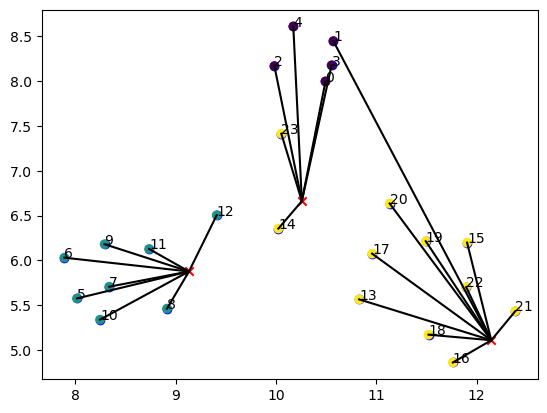

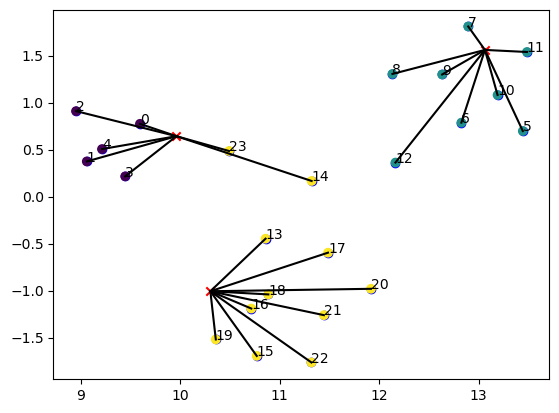

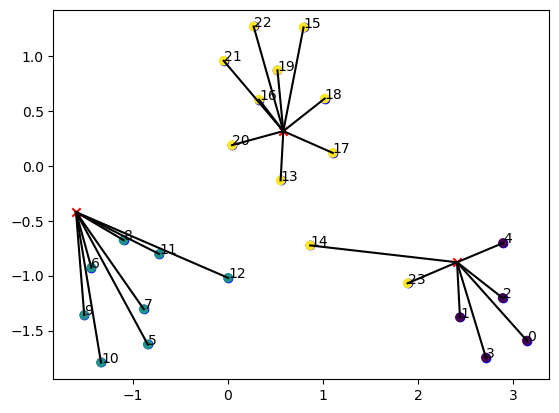

Cluster 0 :
 0 几何学  正多面体  角 面 特性 多面体  经典 语境  描述 实际上 等价 定义  常见 定义 面都 全 正多边形  顶点 数量 种类 正多边形 公共 顶点  立方体 正多面体  面都 正方形  顶点 正方形 公共 顶点  中文 环境  大众 认知 正多面体 代表 五种 凸 正多面体  称为 帕雷托 立体  包括 正四面体  立方体  正 八面体  正 十二面 体和正 二 十面体  定义  正多面体 仅指 面是 正多边形  每条 长 角等 角且 每面 全等 多面体  符合 定义 多面体 凸 多面体  星形 多面体  抽象 多面体 扭歪 多面体  多面体 五种 凸 正多面体 外  四种 非凸 正多面体  开普勒  庞索 立体   五种 抽象 正多面体 五种 复合 正多面体 
 1 立方体 标记  包括 立方体 本身  正方形 面  该面 一条 棱  棱 顶点 立方体 不选 子集  即空 多胞形  五个 元素  正好 维度 元素  较大 元素 包含 元素  多面体 具备 对称性 多面体 任意  如上图  结构  元素  A B  透过 对称性 变换  旋转  平移 或镜射  A 变换 B 位置 上时  占据 空间 区域  多面体 正多面体  性质 称为 标记 可递
 2 几何学  正多面体 一类 对称性 维度 元素 集合  或称 标记  注    传递 多面体  正多面体 高度 对称性  可递  递和面 可递 性质  注     正多面体  角 面 特性 多面体  经典 语境  描述 实际上 等价 定义  常见 定义 面都 全 正多边形  顶点 数量 种类 正多边形 公共 顶点  立方体 正多面体  面都 正方形  顶点 正方形 公共 顶点 
 3 正多面体 皆 施 莱夫 利 符号  计为  n   m   n 面 顶点 数  m 顶点 相邻 多边形 数量  中文 语境  大众 认知 正多面体 代表 五种 凸 正多面体  称为 帕雷托 立体  包括 正四面体  立方体  正 八面体  正 十二面 体和正 二 十面体  定义  正多面体 仅指 面是 正多边形  每条 长 角等 角且 每面 全等 多面体  符合 定义 多面体 凸 多面体  星形 多面体  抽象 多面体 扭歪 多面体  多面体 五种 凸 正多面体 外  四种 非凸 正多面体 

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import umap
LEN  = 24
# gualist = [1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0]
# gualist = [0,0,0,0,0,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2]
gualist = [0,0,0,0,0,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2]
# embedd包含LEN + 3个向量。将向量降维后绘制，前LEN个视为节点，后三个是聚类质心中心。并输入一个label，是长度三十的数组，包含元素{0，1，2}表示节点聚类的标签，根据标签连接节点和质心

def plot_clusters(embedd, label):
    # 使用UMAP进行降维
    reducer = umap.UMAP()
    embeddings_2d = reducer.fit_transform(embedd)
    # embeddings_2d = embedd

    # 绘制节点 并显示ID
    for i in range(LEN):
        plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], c='blue')
        plt.text(embeddings_2d[i, 0], embeddings_2d[i, 1], i)
    plt.scatter(embeddings_2d[:LEN, 0], embeddings_2d[:LEN, 1], c=gualist)


    # 绘制质心
    plt.scatter(embeddings_2d[LEN:, 0], embeddings_2d[LEN:, 1], c='red', marker='x')

    # 连接节点和质心
    for i in range(LEN):
        a = embeddings_2d[i]
        b = embeddings_2d[LEN+int(label[i])]
        plt.plot([a[0], b[0]], [a[1], b[1]], 'k-')

    plt.show()

def kmeans(X, K, max_iters=100):
    # 1. 随机初始化质心

    centroids = X[np.random.choice(range(X.shape[0]), size=K, replace=False)]

    for _ in range(max_iters):

        # 2. 计算每个样本到每个质心的距离
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))

        # 3. 将每个样本分配到最近的质心
        labels = np.argmin(distances, axis=0)

        plot_clusters(np.vstack([X, centroids]), labels)

        # 4. 计算新的质心
        new_centroids = np.array([X[labels==k].mean(axis=0) for k in range(K)])

        # 5. 检查质心是否改变
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels, centroids



labels, centroids = kmeans(embeddings, K=3)

# 根据label，分开打印数据data_set
for i in range(3):
    print(f'Cluster {i} :')
    for j, label in enumerate(labels):
        if label == i:
            print(f' {j} ' + data_set[j])


[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[0 0 0 0 0 2 2 2 2 2 2 2 2 1 0 1 1 1 1 1 1 1 1 0]
0 0
0 1


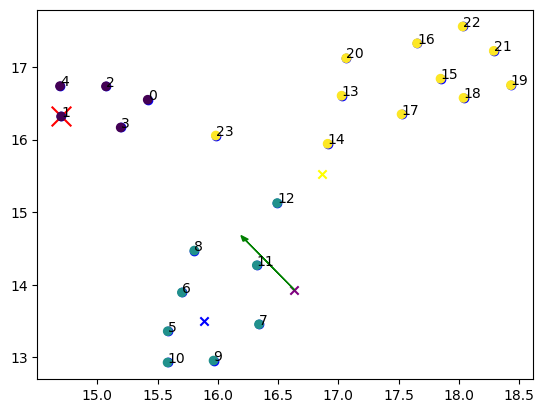

0 0
0 2


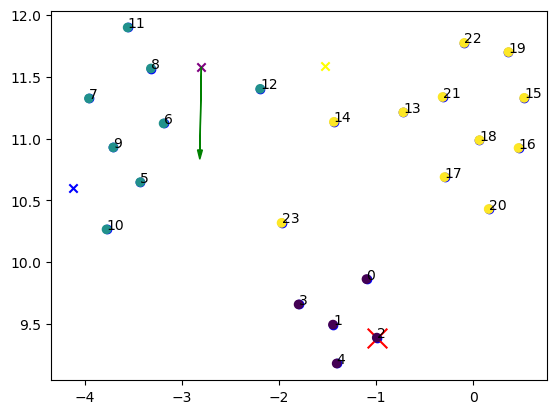

0 0
0 3


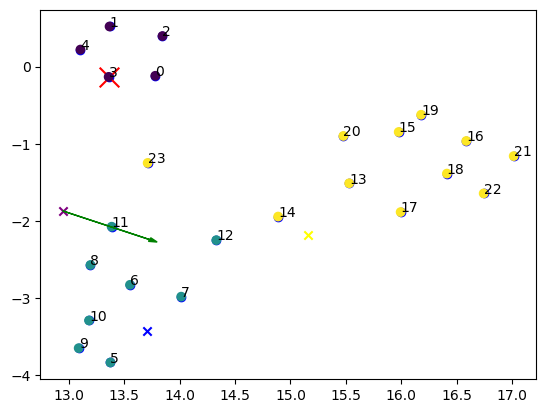

0 0
0 4


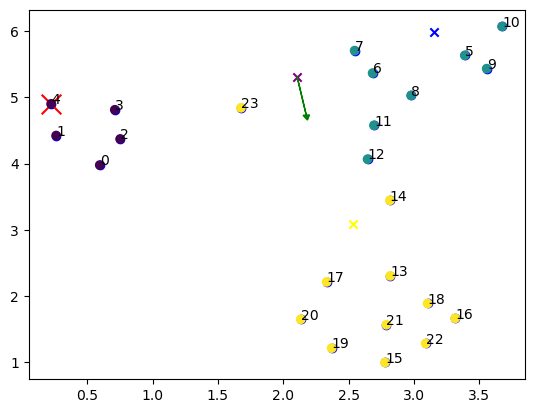

0 0
0 5


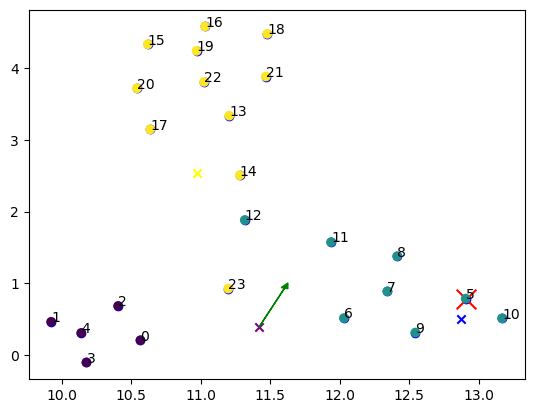

1 1
1 6


In [118]:
import matplotlib.pyplot as plt
import umap

LEN = 24
# embedd包含LEN个向量。并输入一个label，是长度三十的数组，包含元素{0，1，2}表示节点分类 进行学习向量量化
import numpy as np



# 可视化函数，对输入的LEN+4的向量进行降维，前LEN个视为节点，之后三个是向量原型，后一个是调整后的向量原型，prot表示第几个向量被调整，polarity表示调整方向。并输入一个label，是长度三十的数组，包含元素{0，1，2}表示节标签，
def plot_clusters(embedd, label, prot, polarity,redBot):
        # 使用UMAP进行降维
    reducer = umap.UMAP()
    embeddings_2d = reducer.fit_transform(embedd)
    # embeddings_2d = embedd


    # 绘制节点 并显示ID
    for i in range(LEN):
        plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], c='blue')
        plt.text(embeddings_2d[i, 0], embeddings_2d[i, 1], i)
        if i == redBot:
            plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], c='red',marker='x',s=200)
    
    plt.scatter(embeddings_2d[:LEN, 0], embeddings_2d[:LEN, 1], c=gualist)

    # embedd第25个绘制为紫色
    plt.scatter(embeddings_2d[LEN, 0], embeddings_2d[LEN, 1], c='purple',marker='x')
    # embedd第26个绘制为蓝色
    plt.scatter(embeddings_2d[LEN+1, 0], embeddings_2d[LEN+1, 1], c='blue',marker='x')
    # embedd第27个绘制为黄色
    plt.scatter(embeddings_2d[LEN+2, 0], embeddings_2d[LEN+2, 1], c='yellow',marker='x')

    a_protem = embeddings_2d[LEN+prot]
    b_protem = embeddings_2d[-1]

    if polarity == 1:
        plt.arrow(a_protem[0], a_protem[1], b_protem[0] - a_protem[0], b_protem[1] - a_protem[1], head_width=.05,shape='full', length_includes_head=True,color='red')
        # plt.plot([a_protem[0], b_protem[0]], [a_protem[1], b_protem[1]], 'r-')
    else:
        plt.arrow(a_protem[0], a_protem[1], b_protem[0] - a_protem[0], b_protem[1] - a_protem[1], head_width=.05,shape='full', length_includes_head=True,color='green')
        # plt.plot([a_protem[0], b_protem[0]], [a_protem[1], b_protem[1]], 'g-')

    plt.show()




def lvq_fit(embedd, label,prem_embeddings, prem_labels, n_prototypes,n_epochs, learning_rate):
    prototypes = prem_embeddings
    prototype_labels = prem_labels


    for _ in range(n_epochs):
        redBot = 0
        for x, l in zip(embedd, label):  # 使用不同的变量名
            redBot = redBot + 1
            # 计算输入向量到所有原型向量的距离
            distances = np.linalg.norm(prototypes - x, axis=1)
            # 找到最近的原型向量
            nearest_index = np.argmin(distances)

            temp = prototypes[nearest_index]
            polarity = 0 

            # 如果类别相同，将原型向量向输入向量的方向调整
            print(l,prototype_labels[nearest_index])
            print(nearest_index,redBot)

            if l == prototype_labels[nearest_index]:  # 使用新的变量名
                polarity = 0
                prototypes[nearest_index] += learning_rate * (x - prototypes[nearest_index])
            # 如果类别不同，将原型向量向输入向量的相反方向调整
            else:
                polarity = 1
                prototypes[nearest_index] -= learning_rate * (x - prototypes[nearest_index])
            
            plot_clusters(np.vstack([embedd,prototypes,prototypes[nearest_index]]), label, nearest_index, polarity,redBot)
            

    return prototypes, prototype_labels

# 选择 embedding 中的第 7，9，14作为原形变量 输出原形变量和原形变量的标签
prem = [7,9,14]
prem_embeddings = embeddings[prem]
prem_labels = [0,1,2]
print(gualist)
print(labels)


prototypes, prototype_labels = lvq_fit(embeddings, gualist, prem_embeddings,prem_labels, n_prototypes=3, n_epochs=10, learning_rate=0.1)




# print(prototypes,prototype_labels)
